## Demo of Cluster pictures in SageMath

Reload the module whenever it changes for easy development:

In [1]:
%reload_ext autoreload
%autoreload 2
from sage_cluster_pictures import *
set_verbose(0)
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True

Example 1.2 of DMDM

In [68]:
p = 7
x = polygen(Qp(p))
H = HyperellipticCurve((x-1)*(x-(1+p^2))*(x-(1-p^2))*(x-p)*x*(x-p^3)*(x+p^3))
C = Cluster.from_curve(H)
C

Cluster with 7 roots and 2 children

We can display the cluster as ASCII art and unicode art

In [69]:
%display ascii_art
C

((* * *) *) (* * *)

In [70]:
%display unicode_art

In [71]:
C

((● ● ●) ●) (● ● ●)

Finally we should be able to display the nice Tikz graphs, this required a teeny bit of hacking sage.
https://trac.sagemath.org/ticket/19515

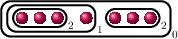

In [72]:
view(C)

In [73]:
latex(C)

 \def\cdepthscale{0.5}   \clusterpicture\Root[A] {1} {first} {mc1c1c1};
\Root[A] {1} {mc1c1c1} {mc1c1c2};
\Root[A] {1} {mc1c1c2} {mc1c1c3};
\ClusterLD mc1c1[][2] = (mc1c1c1)(mc1c1c2)(mc1c1c3);
\Root[A] {1} {mc1c1} {mc1c2};
\ClusterLD mc1[][1] = (mc1c1)(mc1c2);
\Root[A] {1} {mc1} {mc2c1};
\Root[A] {1} {mc2c1} {mc2c2};
\Root[A] {1} {mc2c2} {mc2c3};
\ClusterLD mc2[][2] = (mc2c1)(mc2c2)(mc2c3);
\ClusterLD m[][0] = (mc1)(mc2);
\endclusterpicture

Let's test some basic functionality.

In [74]:
C.is_even()

False

In [75]:
C.is_odd()

True

In [77]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(6), K(5), K(10)])
C.is_ubereven()

True

In [78]:
C

(● ●) (● ●)

In [79]:
%display plain
list(C.all_descendents())

[Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children,
 Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children]

In [80]:
C.children()[0].children()[0].is_proper()

False

In [81]:
C.children()[0].parent_cluster()

Cluster with 4 roots and 2 children

Finally we can make this last example again from just root valuation data, a matrix of valuations of differences. This way we don't pick a prime $p$.

In [14]:
C = Cluster(Matrix(ZZ, 4, 4,[
                   [20, 1, 0, 0 ],
                   [1, 20, 0, 0 ],
                   [0, 0, 20, 1 ],
                   [0, 0, 1, 20 ],
                ]))
C.is_ubereven()

True

In [15]:
print(unicode_art(C))

(● ●) (● ●)


Let's see if it can handle Raymond's example from the draft:

In [16]:
K = Qp(3)
x = polygen(K)
H = HyperellipticCurve(x*(x - 3)*(x - 4)*(x - 13)*(x + 1)*(x + 5))
C = Cluster.from_curve(H)
C

Cluster with 6 roots and 3 children

In [17]:
%display unicode_art
C

● (● ● ●) (● ●)

so far so good!

In [18]:
C = Cluster.from_roots([K(1), K(5), K(10)])
C.children()[0].is_twin()

True

In [19]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
C.is_top_cluster()

True

In [20]:
C.children()[0].is_top_cluster()

False

In [21]:
C.relative_depth()

0

In [82]:
C.children()[1].relative_depth()

1

In [23]:
C2 = Cluster.from_roots([K(5), K(25), K(50)])
C2.depth()

1

In [24]:
C2.relative_depth()

1

In [25]:
C2.children()[1].relative_depth()

1

In [26]:
C2.genus()

1

In [27]:
C = Cluster.from_roots([K(1), K(6), K(26), K(126)])
C.children()[0].children()[0].children()[0].top_cluster()

((● ●) ●) ●

In [28]:
C.children()[0].children()[0].depth()

3

In [29]:
C.children()[0].children()[0].relative_depth()

1

Example 3.5 in the users guide

In [14]:
K = Qp(7,150)
x = polygen(K)
L = K.extension(x^2 + 1, names='a')
x = polygen(L)
L2 = L.extension(x^2 - 7, names='b')
x = polygen(L2)
H = HyperellipticCurve((x^2+7^2)*(x^2-7^(15))*(x-7^6)*(x-7^6-7^9))
R = Cluster.from_curve(H)
R

Cluster with 6 roots and 3 children

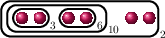

In [17]:
view(R)

In [19]:
unicode_art(R)

'(((● ●)_3 (● ●)_6)_10 ● ●)_2'

In [32]:
R.depth()

2

In [33]:
%display plain
a = R.children()[0]
a.depth()

12

In [34]:
a.relative_depth()

10

In [35]:
t1 = a.children()[0]
t1.depth()

15

In [36]:
t2 = a.children()[1]
t2.depth()

18

In [37]:
a.is_ubereven()

True

In [38]:
t1.is_twin()

True

In [39]:
t2.is_twin()

True

In [40]:
R.is_cotwin()

True

In [41]:
a.is_cotwin()

False

In [42]:
t1.is_cotwin()

False

In [43]:
[c for c in R.all_descendents() if c.is_principal()]

[Cluster with 4 roots and 2 children]

In [44]:
a.is_principal()

True

In [45]:
t1.meet(t2)

Cluster with 4 roots and 2 children

In [46]:
t1.meet(t2) == a

True

In [47]:
t2.meet(t1)

Cluster with 4 roots and 2 children

In [48]:
t2.star()

Cluster with 4 roots and 2 children

In [49]:
a.star()

Cluster with 4 roots and 2 children

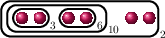

In [50]:
view(R)

A top cotwin

In [51]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
view(C)

In [52]:
C.is_cotwin()

True

In [53]:
C.children()[1]

Cluster with 2 roots and 2 children

In [54]:
C.children()[1].is_cotwin()

False

In [55]:
C.star()

Cluster with 2 roots and 2 children

A non-top cotwin

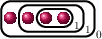

In [56]:
C = Cluster.from_roots([K(1), K(5), K(10), K(35)])
view(C)

In [57]:
C.is_cotwin()

False

In [58]:
C.children()[0].is_cotwin()

False

In [59]:
C.children()[1].is_cotwin()

True

In [60]:
C.children()[1].star()

Cluster with 2 roots and 2 children

In [61]:
C = Cluster.from_roots([K(1), K(2), K(10), K(35)])
view(C)

In [62]:
C.is_cotwin()

True

In [63]:
C.children()[0].is_cotwin()

False

In [64]:
C.children()[1].is_cotwin()

False

In [65]:
C.star()

Cluster with 2 roots and 2 children

In [4]:
K = Qp(5)
x = polygen(K)
H = HyperellipticCurve((x^4-5^4)*(x+1)*(x+2))
C = Cluster.from_curve(H)
view(C)

Making clusters from pictures

In [22]:
set_verbose(1)
Cluster.from_picture(ascii_art(C))

verbose 1 (93: cluster_pictures.py, from_picture) ['(', '*', '*', '(', '*', '*', '*', '*', ')', '1', ')', '0']
verbose 1 (41: cluster_pictures.py, __init__) []


ValueError: min() arg is an empty sequence

In [9]:
ascii_art(C)

'(* * (* * * *)_1)_0'

In [10]:
view(C)

In [10]:
set_verbose(1)
sage: K = Qp(7,150)
sage: x = polygen(K)
sage: L = K.extension(x^2 + 1, names='a')
sage: x = polygen(L)
sage: L2 = L.extension(x^2 - 7, names='b')
sage: x = polygen(L2)
sage: H = HyperellipticCurve((x^2+7^2)*(x^2-7^(15))*(x-7^6)*(x-7^6-7^9))
sage: R = Cluster.from_curve(H)
sage: a = R.children()[0]
sage: a.theta()

verbose 1 (44: cluster_pictures.py, __init__) [300  15  12  12   2   2]
[ 15 300  12  12   2   2]
[ 12  12 300  18   2   2]
[ 12  12  18 300   2   2]
[  2   2   2   2 300   2]
[  2   2   2   2   2 300]
verbose 1 (44: cluster_pictures.py, __init__) 2
verbose 1 (44: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1, 2, 3], 4: [4], 5: [5]})
verbose 1 (44: cluster_pictures.py, __init__) [300  15  12  12]
[ 15 300  12  12]
[ 12  12 300  18]
[ 12  12  18 300]
verbose 1 (44: cluster_pictures.py, __init__) 12
verbose 1 (44: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1], 2: [2, 3]})
verbose 1 (44: cluster_pictures.py, __init__) [300  15]
[ 15 300]
verbose 1 (44: cluster_pictures.py, __init__) 15
verbose 1 (44: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (44: cluster_pictures.py, __init__) [300]
verbose 1 (44: cluster_pictures.py, __init__) 300
verbose 1 (44: cluster_pictures.py, __init__) defaultdict(<class 'l

b^2 + 4*b^28 + 3*b^30 + 3*b^32 + 3*b^34 + 3*b^36 + 3*b^38 + 3*b^40 + 3*b^42 + 3*b^44 + 3*b^46 + 3*b^48 + 3*b^50 + 3*b^52 + 2*b^54 + 4*b^56 + 2*b^58 + 4*b^60 + 2*b^62 + 4*b^64 + 2*b^66 + 4*b^68 + 2*b^70 + 4*b^72 + 2*b^74 + 4*b^76 + 2*b^78 + b^80 + 2*b^82 + b^84 + 2*b^86 + b^88 + 2*b^90 + b^92 + 2*b^94 + b^96 + 2*b^98 + b^100 + 2*b^102 + b^104 + 3*b^106 + 2*b^108 + 2*b^110 + 3*b^112 + b^114 + 4*b^116 + 5*b^120 + 6*b^122 + 5*b^124 + 5*b^126 + 6*b^128 + 4*b^130 + 6*b^134 + 2*b^136 + 5*b^140 + b^142 + 3*b^146 + 2*b^148 + 4*b^150 + 4*b^152 + 5*b^154 + 6*b^156 + 6*b^158 + 3*b^160 + 5*b^162 + 2*b^164 + 2*b^166 + 3*b^168 + 4*b^170 + 5*b^172 + 4*b^174 + 2*b^176 + 3*b^178 + b^180 + 5*b^184 + 6*b^186 + 4*b^188 + 3*b^190 + 5*b^194 + 5*b^196 + 3*b^198 + 6*b^200 + 6*b^202 + 2*b^204 + 2*b^208 + 3*b^210 + b^212 + 2*b^214 + 6*b^216 + 3*b^218 + 3*b^220 + b^224 + 5*b^226 + 6*b^228 + 2*b^230 + b^236 + 2*b^238 + 5*b^240 + b^242 + 6*b^244 + b^246 + 4*b^248 + 5*b^250 + 6*b^252 + b^254 + b^258 + 6*b^260 + 3*b^

In [11]:
b^2

NameError: name 'b' is not defined

In [12]:
a.theta()

verbose 1 (789: cluster_pictures.py, theta) b^4 + b^30 + O(b^304)


b^2 + 4*b^28 + 3*b^30 + 3*b^32 + 3*b^34 + 3*b^36 + 3*b^38 + 3*b^40 + 3*b^42 + 3*b^44 + 3*b^46 + 3*b^48 + 3*b^50 + 3*b^52 + 2*b^54 + 4*b^56 + 2*b^58 + 4*b^60 + 2*b^62 + 4*b^64 + 2*b^66 + 4*b^68 + 2*b^70 + 4*b^72 + 2*b^74 + 4*b^76 + 2*b^78 + b^80 + 2*b^82 + b^84 + 2*b^86 + b^88 + 2*b^90 + b^92 + 2*b^94 + b^96 + 2*b^98 + b^100 + 2*b^102 + b^104 + 3*b^106 + 2*b^108 + 2*b^110 + 3*b^112 + b^114 + 4*b^116 + 5*b^120 + 6*b^122 + 5*b^124 + 5*b^126 + 6*b^128 + 4*b^130 + 6*b^134 + 2*b^136 + 5*b^140 + b^142 + 3*b^146 + 2*b^148 + 4*b^150 + 4*b^152 + 5*b^154 + 6*b^156 + 6*b^158 + 3*b^160 + 5*b^162 + 2*b^164 + 2*b^166 + 3*b^168 + 4*b^170 + 5*b^172 + 4*b^174 + 2*b^176 + 3*b^178 + b^180 + 5*b^184 + 6*b^186 + 4*b^188 + 3*b^190 + 5*b^194 + 5*b^196 + 3*b^198 + 6*b^200 + 6*b^202 + 2*b^204 + 2*b^208 + 3*b^210 + b^212 + 2*b^214 + 6*b^216 + 3*b^218 + 3*b^220 + b^224 + 5*b^226 + 6*b^228 + 2*b^230 + b^236 + 2*b^238 + 5*b^240 + b^242 + 6*b^244 + b^246 + 4*b^248 + 5*b^250 + 6*b^252 + b^254 + b^258 + 6*b^260 + 3*b^

In [13]:
a.center()

b^15 + O(b^315)